In [34]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [35]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier

In [36]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\A\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\A\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [37]:
resumeData0 = pd.read_csv('Resume_1.csv' ,encoding='utf-8')
resumeData1 = pd.read_csv('UpdatedResumeDataSet.csv' ,encoding='utf-8')
resumeData = pd.concat([resumeData0, resumeData1], axis=0)
resumeData['structured_resume'] = ''
resumeData.head()

,Category,Resume,structured_resume
0,HR,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,
1,HR,"HR SPECIALIST, US HR OPERATIONS ...",
2,HR,HR DIRECTOR Summary Over 2...,
3,HR,HR SPECIALIST Summary Dedica...,
4,HR,HR MANAGER Skill Highlights ...,


In [40]:
resumeData.to_csv("all_data.csv",encoding='utf-8')

In [10]:
# for i in range(2,84):
#     resumeData.drop(resumeData.columns[[i]],axis=1,inplace=True)

In [11]:
# resumeData.drop(resumeData.columns[[0,3,4]],axis=1,inplace=True)

In [12]:
# for i in range(0,len(resumeData['Category'])):
#     if resumeData['Category'][i] == 'Engineering':
# resumeData.drop(['Engineering'],inplace=True,axis=0)

In [13]:
resumeData.head()

,Category,Resume,structured_resume
0,HR,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,
1,HR,"HR SPECIALIST, US HR OPERATIONS ...",
2,HR,HR DIRECTOR Summary Over 2...,
3,HR,HR SPECIALIST Summary Dedica...,
4,HR,HR MANAGER Skill Highlights ...,


In [14]:
print("Displaying the unique categories in resume ")
print(resumeData['Category'].unique())

Displaying the unique categories in resume 
['HR' 'DESIGNER' 'INFORMATION-TECHNOLOGY' 'TEACHER' 'ADVOCATE' nan
 'BUSINESS-DEVELOPMENT' 'HEALTHCARE' 'FITNESS' 'AGRICULTURE' 'BPO' 'SALES'
 'CONSULTANT' 'DIGITAL-MEDIA' 'AUTOMOBILE' 'CHEF' 'FINANCE' 'APPAREL'
 'ACCOUNTANT' 'CONSTRUCTION' 'PUBLIC-RELATIONS' 'BANKING' 'ARTS'
 'AVIATION' 'Data Science' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [15]:
print ("Displaying the unique categories of resume and number of records")
Datas=resumeData['Category'].value_counts()
print(Datas)

Displaying the unique categories of resume and number of records
HR                           154
INFORMATION-TECHNOLOGY       119
BUSINESS-DEVELOPMENT         119
CHEF                         117
FITNESS                      117
AVIATION                     117
ACCOUNTANT                   116
FINANCE                      116
CONSULTANT                   115
SALES                        115
ADVOCATE                     115
BANKING                      115
HEALTHCARE                   113
PUBLIC-RELATIONS             110
CONSTRUCTION                 108
DESIGNER                     106
ARTS                         103
TEACHER                      102
APPAREL                       96
DIGITAL-MEDIA                 95
Java Developer                84
Testing                       71
AGRICULTURE                   63
DevOps Engineer               55
Python Developer              48
Web Designing                 45
Hadoop                        42
Data Science                  40
Operations 

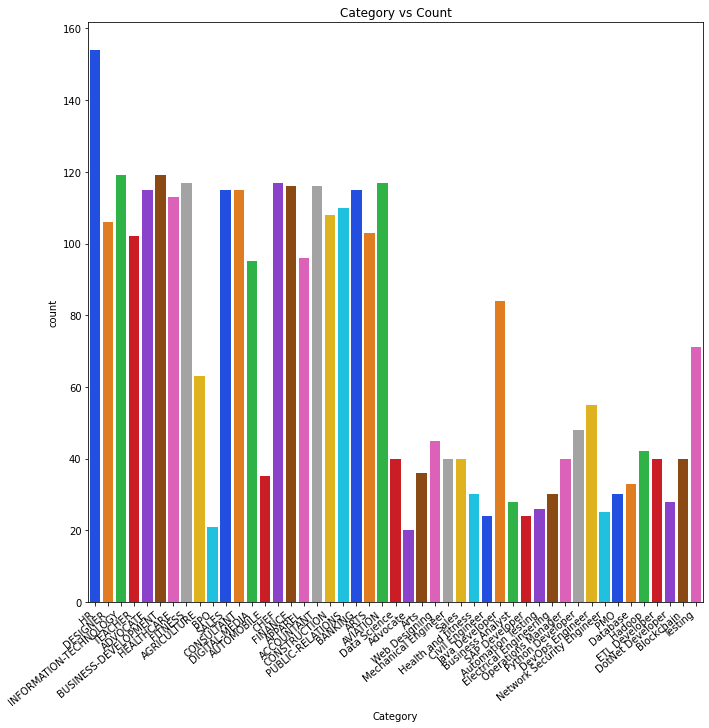

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
ax = sns.countplot(x="Category", data=resumeData,palette="bright")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.title("Category vs Count")
plt.show()

In [17]:
resumeData.head()

,Category,Resume,structured_resume
0,HR,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,
1,HR,"HR SPECIALIST, US HR OPERATIONS ...",
2,HR,HR DIRECTOR Summary Over 2...,
3,HR,HR SPECIALIST Summary Dedica...,
4,HR,HR MANAGER Skill Highlights ...,


In [20]:
# from matplotlib.gridspec import GridSpec
# targetCount = resumeData['Category'].value_counts()
# targetLabel  = resumeData['Category'].unique()
# plt.figure(1, figsize=(22,22))
# the_grid = GridSpec(2, 2)
# cmap = plt.get_cmap('Wistia')
# colors = [cmap(i) for i in np.linspace(0, 1, 3)]
# plt.subplot(the_grid[0, 1], aspect=1, title='Category Distribution')
# source_pie = plt.pie(targetCount, labels=targetLabel, autopct='%1.1f%%', shadow=True, colors=colors)
# plt.show()

In [21]:
import re
def clean_resume(Text):
    Text = re.sub('http\S+\s*', ' ', Text)
    Text = re.sub('@\S+', '  ', Text)
    Text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', Text)
    Text = re.sub('RT|cc', ' ', Text)
    Text = re.sub('#\S+', '', Text)
    Text = re.sub(r'[^\x00-\x7f]',r' ',Text) 
    Text = re.sub('\s+', ' ', Text)
    return Text    
resumeData['structured_resume'] = resumeData.Resume.apply(lambda x: clean_resume(x))

In [22]:
Set_Of_StopWords = set(stopwords.words('english')+['``',"''"])
total_Words =[]
Sentences = resumeData['Resume'].values
cleaned_Sentences = ""
for i in range(0,160):
    cleanedText = clean_resume(Sentences[i])
    cleaned_Sentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in Set_Of_StopWords and word not in string.punctuation:
            total_Words.append(word)

In [23]:
wordfrequencydist = nltk.FreqDist(total_Words)
mostCommon = wordfrequencydist.most_common(50)
print(mostCommon)

[('HR', 991), ('State', 948), ('City', 917), ('Company', 743), ('Name', 709), ('employee', 619), ('management', 591), ('employees', 494), ('Management', 460), ('new', 448), ('Human', 447), ('training', 421), ('design', 328), ('A', 325), ('company', 319), ('including', 316), ('development', 299), ('policies', 292), ('benefits', 286), ('process', 277), ('Resources', 268), ('skills', 254), ('procedures', 246), ('staff', 244), ('business', 244), ('team', 244), ('Skills', 238), ('payroll', 234), ('issues', 225), ('programs', 221), ('job', 221), ('performance', 220), ('2014', 218), ('customer', 214), ('01', 211), ('Employee', 210), ('reports', 208), ('Business', 207), ('support', 206), ('I', 198), ('information', 194), ('recruitment', 189), ('Education', 186), ('Manager', 185), ('University', 185), ('Experience', 184), ('work', 184), ('data', 180), ('service', 176), ('personnel', 176)]


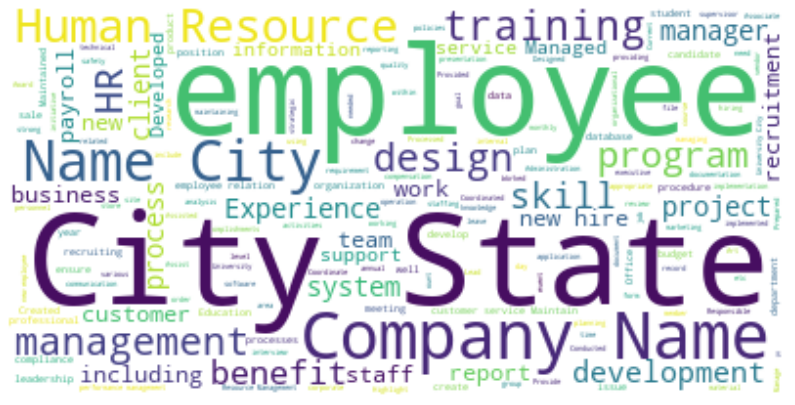

In [24]:
word_cloud = WordCloud(background_color="white").generate(cleaned_Sentences)
plt.figure(figsize=(14,14))
plt.imshow(word_cloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [25]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Category']
le = LabelEncoder()
print(resumeData['Category'].unique())
for i in var_mod:
    resumeData[i] = le.fit_transform(resumeData[i])
print(resumeData['Category'].unique())




['HR' 'DESIGNER' 'INFORMATION-TECHNOLOGY' 'TEACHER' 'ADVOCATE' nan
 'BUSINESS-DEVELOPMENT' 'HEALTHCARE' 'FITNESS' 'AGRICULTURE' 'BPO' 'SALES'
 'CONSULTANT' 'DIGITAL-MEDIA' 'AUTOMOBILE' 'CHEF' 'FINANCE' 'APPAREL'
 'ACCOUNTANT' 'CONSTRUCTION' 'PUBLIC-RELATIONS' 'BANKING' 'ARTS'
 'AVIATION' 'Data Science' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']
[30 19 33 44  1 47 12 29 28  2 11 41 17 20  5 15 27  3  0 16 39 10  4  6
 21  7  8 46 35 43 32 18 34 14 42  9 26 37 40 23 36 38 22 31 25 24 13 45]


In [26]:
from sklearn.svm import SVC



In [27]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
required_Text = resumeData['structured_resume'].values
required_Target = resumeData['Category'].values
word_vectorizer = TfidfVectorizer(sublinear_tf=True,stop_words='english',max_features=1500)
word_vectorizer.fit(required_Text)


WordFeatures = word_vectorizer.transform(required_Text)

WordFeatures.shape

(3310, 1500)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(WordFeatures,required_Target,random_state=0, test_size=0.2)
clf = SVC(probability=True)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
# print("KNeighbors Classifier")
print('Accuracy on training dataset: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy on test dataset: {:.2f}'.format(clf.score(X_test, y_test)))
print(metrics.classification_report(y_test, prediction))

Accuracy on training dataset: 0.98
Accuracy on test dataset: 0.72
              precision    recall  f1-score   support

           0       0.71      0.81      0.76        27
           1       0.52      0.41      0.46        29
           2       0.67      0.20      0.31        10
           3       0.85      0.55      0.67        20
           4       0.42      0.25      0.31        20
           5       0.00      0.00      0.00         7
           6       0.75      0.75      0.75        16
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         8
           9       1.00      0.75      0.86         8
          10       0.39      0.47      0.43        19
          11       0.00      0.00      0.00         7
          12       0.56      0.65      0.60        31
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00         5
          15       0.86      0.82      0.84        22
          16   

In [ ]:
import joblib

In [ ]:
joblib_file = "model.pkl"  
joblib.dump(clf, joblib_file)

['model.pkl']

In [ ]:
jblibmodel = joblib.load(joblib_file)

In [ ]:
jblibmodel

SVC(probability=True)

In [ ]:
resumeData.head()

,Category,Resume,structured_resume
0,30,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR ADMINISTRATOR MARKETING ASSOCIATE HR ADMIN...
1,30,"HR SPECIALIST, US HR OPERATIONS ...",HR SPECIALIST US HR OPERATIONS Summary Versat...
2,30,HR DIRECTOR Summary Over 2...,HR DIRECTOR Summary Over 20 years experience ...
3,30,HR SPECIALIST Summary Dedica...,HR SPECIALIST Summary Dedicated Driven and Dy...
4,30,HR MANAGER Skill Highlights ...,HR MANAGER Skill Highlights HR SKILLS HR Depa...


In [ ]:
word_vectorizer

TfidfVectorizer(max_features=1500, stop_words='english', sublinear_tf=True)

In [ ]:
joblib_file_vec = "model1_vec.pkl"  
joblib.dump(word_vectorizer, joblib_file_vec)

['model1_vec.pkl']

In [28]:
# dict_job = {}
# for i in range(0,len(cat)):
#     dict_job[cat[i]] = prob[i]

In [29]:
# dict_job

In [30]:
import joblib
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import re
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud
import string
from nltk.corpus import stopwords
import nltk
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from pandas.plotting import scatter_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
import pandas as pd
import numpy as np
import pandas as pd
import os
import seaborn as sns
import warnings


dict_job = {'HR': 30, 'DESIGNER': 19, 'INFORMATION-TECHNOLOGY': 33, 'TEACHER': 44, 'ADVOCATE': 1, 'nan': 47, 'BUSINESS-DEVELOPMENT': 12, 'HEALTHCARE': 29, 'FITNESS': 28, 'AGRICULTURE': 2, 'BPO': 11, 'SALES': 41, 'CONSULTANT': 17, 'DIGITAL-MEDIA': 20, 'AUTOMOBILE': 5, 'CHEF': 15, 'FINANCE': 27, 'APPAREL': 3, 'ACCOUNTANT': 0, 'CONSTRUCTION': 16, 'PUBLIC-RELATIONS': 39, 'BANKING': 10, 'ARTS': 4, 'AVIATION': 6, 'Data Science': 21, 'Advocate': 7, 'Arts': 8,
            'Web Designing': 46, 'Mechanical Engineer': 35, 'Sales': 43, 'Health and fitness': 32, 'Civil Engineer': 18, 'Java Developer': 34, 'Business Analyst': 14, 'SAP Developer': 42, 'Automation Testing': 9, 'Electrical Engineering': 26, 'Operations Manager': 37, 'Python Developer': 40, 'DevOps Engineer': 23, 'Network Security Engineer': 36, 'PMO': 38, 'Database': 22, 'Hadoop': 31, 'ETL Developer': 25, 'DotNet Developer': 24, 'Blockchain': 13, 'Testing': 45}


inp_data = input("Enter resume: ")
data = {"Resume": [inp_data]}
dataf = pd.DataFrame(data)
dataf['structured_resume'] = ''


def clean_resume(Text):
    Text = re.sub('http\S+\s*', ' ', Text)
    Text = re.sub('@\S+', '  ', Text)
    Text = re.sub('[%s]' % re.escape(
        """!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', Text)
    Text = re.sub('RT|cc', ' ', Text)
    Text = re.sub('#\S+', '', Text)
    Text = re.sub(r'[^\x00-\x7f]', r' ', Text)
    Text = re.sub('\s+', ' ', Text)
    return Text


dataf['structured_resume'] = dataf.Resume.apply(lambda x: clean_resume(x))

Set_Of_StopWords = set(stopwords.words('english')+['``', "''"])
total_Words = []
Sentences = dataf['Resume'].values
cleaned_Sentences = ""
for i in range(0, len(Sentences)):
    cleanedText = clean_resume(Sentences[i])
    cleaned_Sentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in Set_Of_StopWords and word not in string.punctuation:
            total_Words.append(word)


wordfrequencydist = nltk.FreqDist(total_Words)
mostCommon = wordfrequencydist.most_common(50)
required_Text = dataf['structured_resume'].values
word_vectorizer = joblib.load('model1_vec.pkl')
required_Text = required_Text[~pd.isnull(required_Text)]
WordFeatures = word_vectorizer.transform(required_Text)

clf = joblib.load('model.pkl')
predicted = clf.predict(WordFeatures)
print(predicted)

new_val = predicted
result= [new_k for new_k in dict_job.items() if new_k[1] == new_val][0][0]
prob = clf.predict_proba(WordFeatures)
print(prob)


[30]
[[0.0051993  0.01500798 0.03488898 0.03841328 0.11322239 0.03251828
  0.01455947 0.00299022 0.00327441 0.0019813  0.0114897  0.02158475
  0.01657938 0.00160901 0.00195263 0.01466655 0.12196119 0.02905807
  0.00214836 0.02702362 0.01662599 0.00194751 0.00192053 0.00351957
  0.0013101  0.0009853  0.00138105 0.00882516 0.01598938 0.00937283
  0.3161654  0.00109955 0.00268574 0.01147452 0.00219778 0.00179937
  0.00117557 0.00109707 0.00086314 0.01110479 0.00130686 0.02069567
  0.00176602 0.00151501 0.04810753 0.0017455  0.00117488 0.00201932]]


In [31]:
new_val = predicted[0]
result= [new_k for new_k in dict_job.items() if new_k[1] == new_val][0][0]

In [32]:
new_val

30

In [33]:
result

'HR'

In [41]:
newdf = pd.read_csv("all_data.csv")

In [42]:
newdf = pd.DataFrame(newdf)

In [43]:
newdf

,Unnamed: 0,Category,Resume,structured_resume
0,0,HR,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,NaN
1,1,HR,"HR SPECIALIST, US HR OPERATIONS ...",NaN
2,2,HR,HR DIRECTOR Summary Over 2...,NaN
3,3,HR,HR SPECIALIST Summary Dedica...,NaN
4,4,HR,HR MANAGER Skill Highlights ...,NaN
...,...,...,...,...
3305,959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",NaN
3306,960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,NaN
3307,961,Testing,Skill Set OS Windows XP/7/8/8.1/10 Database MY...,NaN
3308,962,HR,management skill good talking skill communicat...,NaN
